In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importar librerias
import pandas as pd
import numpy as np
import plotly.express as px
%matplotlib inline
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.stats import norm

particles = pd.read_csv('/content/drive/My Drive/Sample7.csv', delimiter=',')
particles.head()

,Run,Event,pt1,eta1,phi1,Q1,type1,sigmaEtaEta1,HoverE1,isoTrack1,...,pt2,eta2,phi2,Q2,type2,sigmaEtaEta2,HoverE2,isoTrack2,isoEcal2,isoHcal2
0,163286,109060857,37.5667,2.2892,2.0526,-1,EE,0.0251,0.0090,0.0000,...,45.4315,1.4706,-1.1630,1,EB,0.0008,0.000,0.0000,1.0190,0.0000
1,163286,109275715,36.2901,-0.8373,-1.5859,1,EB,0.0078,0.0438,0.0000,...,60.5754,-0.4896,1.0496,-1,EB,0.0112,0.000,0.7185,1.8461,0.0000
2,163286,109075352,25.9705,-0.6974,1.6360,-1,EB,0.0097,0.0407,6.2870,...,45.2954,-2.0401,3.1187,1,EE,0.0260,0.028,15.2170,4.5337,3.8370
3,163286,109169766,41.0075,1.4619,-0.5325,1,EB,0.0088,0.0000,0.0000,...,45.9013,1.1561,2.4786,-1,EB,0.0086,0.000,0.0000,2.4388,0.5676
4,163286,108947653,39.8985,-0.5927,-2.3947,1,EB,0.0153,0.0000,2.5435,...,34.8931,-2.2444,0.6106,-1,EE,0.0290,0.000,12.4229,0.4534,0.9096


  Variable  Count      Media  Desviación Estándar     Moda   Mínimo   Máximo
0      pt1  10000  39.820004            11.598636  30.6963  25.0030  252.099
1      pt2  10000  41.376158            12.085252  34.0868  25.0013  211.717


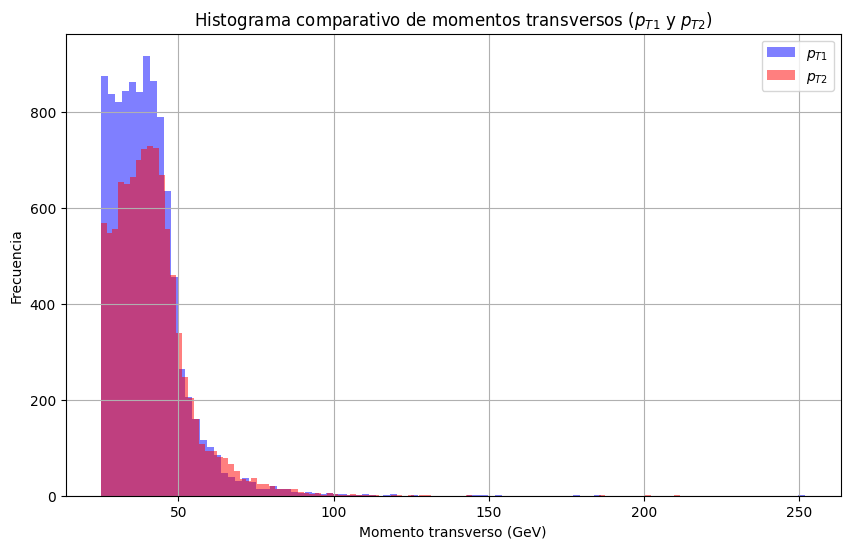

In [3]:
# Calcular estadísticas para los momentos transversos (pt1 y pt2)
statistics_pt = {
    'Variable': ['pt1', 'pt2'],
    'Count': [particles['pt1'].count(), particles['pt2'].count()],
    'Media': [particles['pt1'].mean(), particles['pt2'].mean()],
    'Desviación Estándar': [particles['pt1'].std(), particles['pt2'].std()],
    'Moda': [particles['pt1'].value_counts().idxmax(), particles['pt2'].value_counts().idxmax()],
    'Mínimo': [particles['pt1'].min(), particles['pt2'].min()],
    'Máximo': [particles['pt1'].max(), particles['pt2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_pt_df = pd.DataFrame(statistics_pt)

# Mostrar la tabla
print(statistics_pt_df)

# Crear el histograma comparativo para los momentos transversos
plt.figure(figsize=(10, 6))
plt.hist(particles['pt1'], bins=100, alpha=0.5, label='$p_{T1}$', color='blue')
plt.hist(particles['pt2'], bins=100, alpha=0.5, label='$p_{T2}$', color='red')
plt.title('Histograma comparativo de momentos transversos ($p_{T1}$ y $p_{T2}$)')
plt.xlabel('Momento transverso (GeV)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

  Variable  Count     Media  Desviación Estándar    Moda  Mínimo  Máximo
0     eta1  10000 -0.004236             1.207731  0.6873 -2.5744  2.6189
1     eta2  10000  0.008657             1.437133  0.4062 -2.6288  2.6047


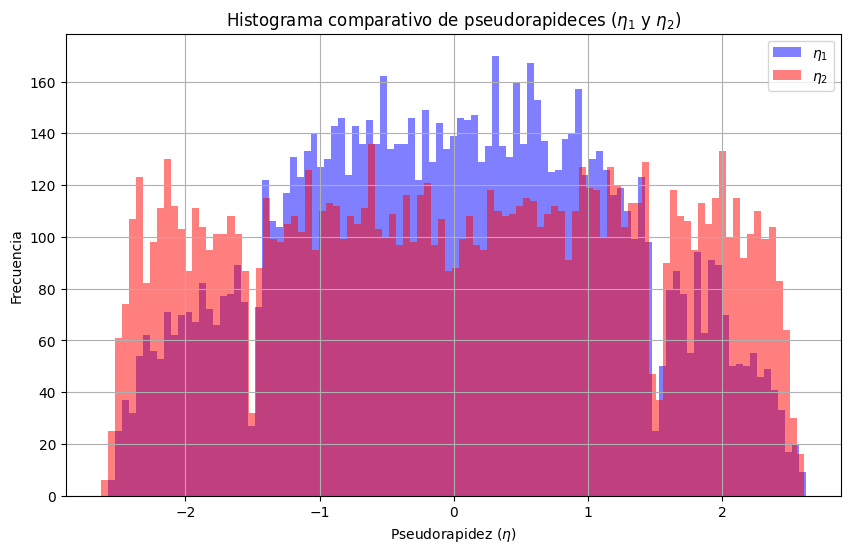

In [4]:
# Calcular estadísticas para las etas (eta1 y eta2)
statistics_eta = {
    'Variable': ['eta1', 'eta2'],
    'Count': [particles['eta1'].count(), particles['eta2'].count()],
    'Media': [particles['eta1'].mean(), particles['eta2'].mean()],
    'Desviación Estándar': [particles['eta1'].std(), particles['eta2'].std()],
    'Moda': [particles['eta1'].value_counts().idxmax(), particles['eta2'].value_counts().idxmax()],
    'Mínimo': [particles['eta1'].min(), particles['eta2'].min()],
    'Máximo': [particles['eta1'].max(), particles['eta2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_eta_df = pd.DataFrame(statistics_eta)

# Mostrar la tabla
print(statistics_eta_df)

# Crear el histograma comparativo para las etas
plt.figure(figsize=(10, 6))
plt.hist(particles['eta1'], bins=100, alpha=0.5, label='$\\eta_1$', color='blue')
plt.hist(particles['eta2'], bins=100, alpha=0.5, label='$\\eta_2$', color='red')
plt.title('Histograma comparativo de pseudorapideces ($\\eta_1$ y $\\eta_2$)')
plt.xlabel('Pseudorapidez ($\\eta$)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

  Variable  Count     Media  Desviación Estándar    Moda  Mínimo  Máximo
0     phi1  10000 -0.011530             1.818831  2.7593 -3.1416  3.1412
1     phi2  10000  0.028482             1.813896  2.8573 -3.1402  3.1414


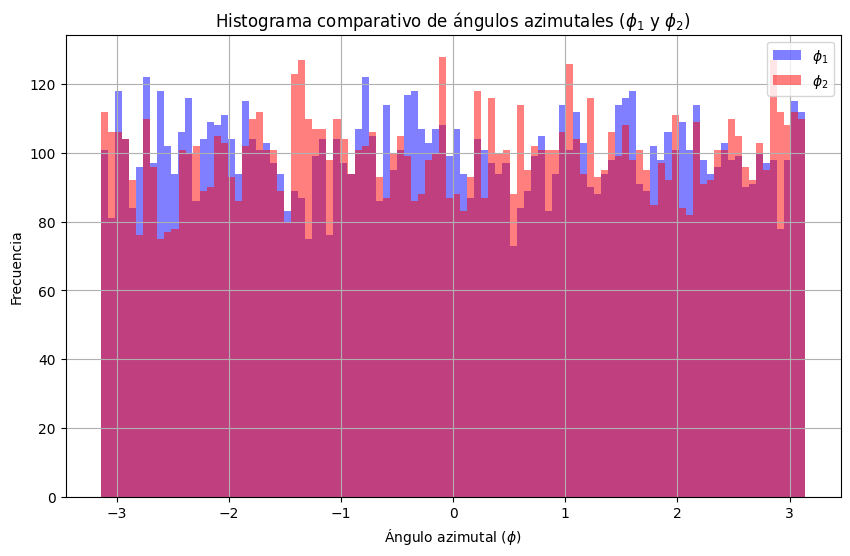

In [5]:
# Calcular estadísticas para los ángulos azimutales (phi1 y phi2)
statistics_phi = {
    'Variable': ['phi1', 'phi2'],
    'Count': [particles['phi1'].count(), particles['phi2'].count()],
    'Media': [particles['phi1'].mean(), particles['phi2'].mean()],
    'Desviación Estándar': [particles['phi1'].std(), particles['phi2'].std()],
    'Moda': [particles['phi1'].value_counts().idxmax(), particles['phi2'].value_counts().idxmax()],
    'Mínimo': [particles['phi1'].min(), particles['phi2'].min()],
    'Máximo': [particles['phi1'].max(), particles['phi2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_phi_df = pd.DataFrame(statistics_phi)

# Mostrar la tabla
print(statistics_phi_df)

# Crear el histograma comparativo para los ángulos azimutales
plt.figure(figsize=(10, 6))
plt.hist(particles['phi1'], bins=100, alpha=0.5, label='$\\phi_{1}$', color='blue')
plt.hist(particles['phi2'], bins=100, alpha=0.5, label='$\\phi_{2}$', color='red')
plt.title('Histograma comparativo de ángulos azimutales ($\\phi_{1}$ y $\\phi_{2}$)')
plt.xlabel('Ángulo azimutal ($\\phi$)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

       Variable  Count     Media  Desviación Estándar    Moda  Mínimo  Máximo
0  sigmaEtaEta1  10000  0.012418             0.005824  0.0087  0.0007  0.0613
1  sigmaEtaEta2  10000  0.014082             0.007175  0.0086  0.0003  0.0731


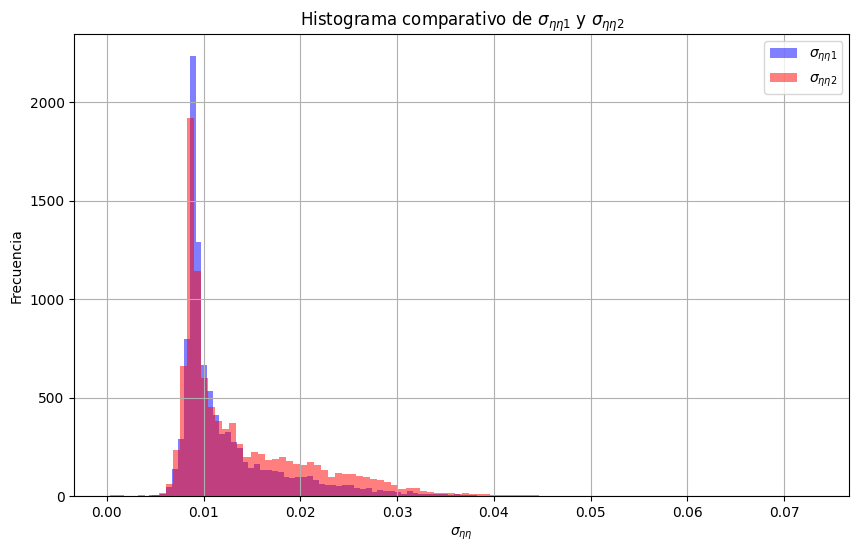

In [6]:
# Calcular estadísticas para sigmaEtaEta1 y sigmaEtaEta2
statistics_sigmaEtaEta = {
    'Variable': ['sigmaEtaEta1', 'sigmaEtaEta2'],
    'Count': [particles['sigmaEtaEta1'].count(), particles['sigmaEtaEta2'].count()],
    'Media': [particles['sigmaEtaEta1'].mean(), particles['sigmaEtaEta2'].mean()],
    'Desviación Estándar': [particles['sigmaEtaEta1'].std(), particles['sigmaEtaEta2'].std()],
    'Moda': [particles['sigmaEtaEta1'].value_counts().idxmax(), particles['sigmaEtaEta2'].value_counts().idxmax()],
    'Mínimo': [particles['sigmaEtaEta1'].min(), particles['sigmaEtaEta2'].min()],
    'Máximo': [particles['sigmaEtaEta1'].max(), particles['sigmaEtaEta2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_sigmaEtaEta_df = pd.DataFrame(statistics_sigmaEtaEta)

# Mostrar la tabla de estadísticas
print(statistics_sigmaEtaEta_df)

# Crear el histograma comparativo para sigmaEtaEta1 y sigmaEtaEta2
plt.figure(figsize=(10, 6))
plt.hist(particles['sigmaEtaEta1'], bins=100, alpha=0.5, label='$\\sigma_{\\eta\\eta1}$', color='blue')
plt.hist(particles['sigmaEtaEta2'], bins=100, alpha=0.5, label='$\\sigma_{\\eta\\eta2}$', color='red')
plt.title('Histograma comparativo de $\\sigma_{\\eta\\eta1}$ y $\\sigma_{\\eta\\eta2}$')
plt.xlabel('$\\sigma_{\\eta\\eta}$')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

  Variable  Count     Media  Desviación Estándar  Moda  Mínimo  Máximo
0  HoverE1  10000  0.023591             0.041234   0.0     0.0  1.1412
1  HoverE2  10000  0.020239             0.037990   0.0     0.0  1.2740


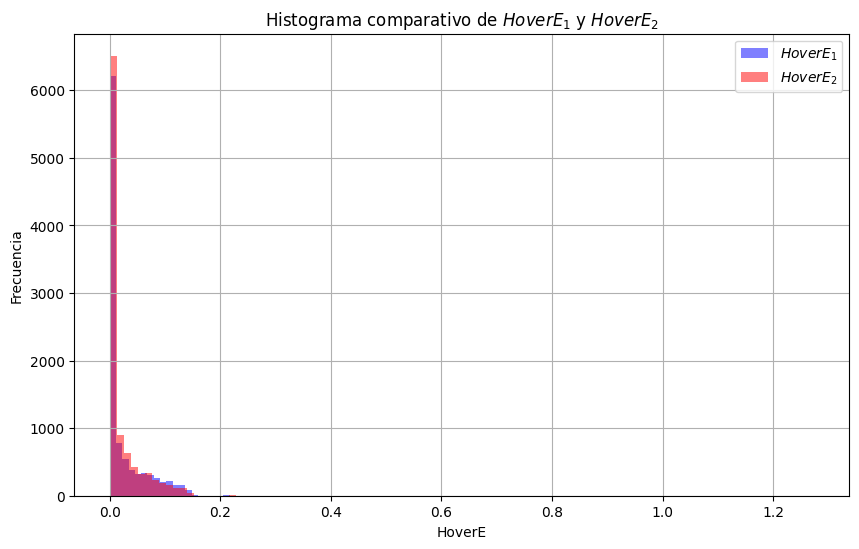

In [7]:
# Calcular estadísticas para HoverE1 y HoverE2
statistics_HoverE = {
    'Variable': ['HoverE1', 'HoverE2'],
    'Count': [particles['HoverE1'].count(), particles['HoverE2'].count()],
    'Media': [particles['HoverE1'].mean(), particles['HoverE2'].mean()],
    'Desviación Estándar': [particles['HoverE1'].std(), particles['HoverE2'].std()],
    'Moda': [particles['HoverE1'].value_counts().idxmax(), particles['HoverE2'].value_counts().idxmax()],
    'Mínimo': [particles['HoverE1'].min(), particles['HoverE2'].min()],
    'Máximo': [particles['HoverE1'].max(), particles['HoverE2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_HoverE_df = pd.DataFrame(statistics_HoverE)

# Mostrar la tabla de estadísticas
print(statistics_HoverE_df)

# Crear el histograma comparativo para HoverE1 y HoverE2
plt.figure(figsize=(10, 6))
plt.hist(particles['HoverE1'], bins=100, alpha=0.5, label='$HoverE_{1}$', color='blue')
plt.hist(particles['HoverE2'], bins=100, alpha=0.5, label='$HoverE_{2}$', color='red')
plt.title('Histograma comparativo de $HoverE_{1}$ y $HoverE_{2}$')
plt.xlabel('HoverE')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

    Variable  Count     Media  Desviación Estándar  Moda  Mínimo   Máximo
0  isoTrack1  10000  5.809642             9.850592   0.0     0.0  336.262
1  isoTrack2  10000  5.291606             9.414047   0.0     0.0  205.613


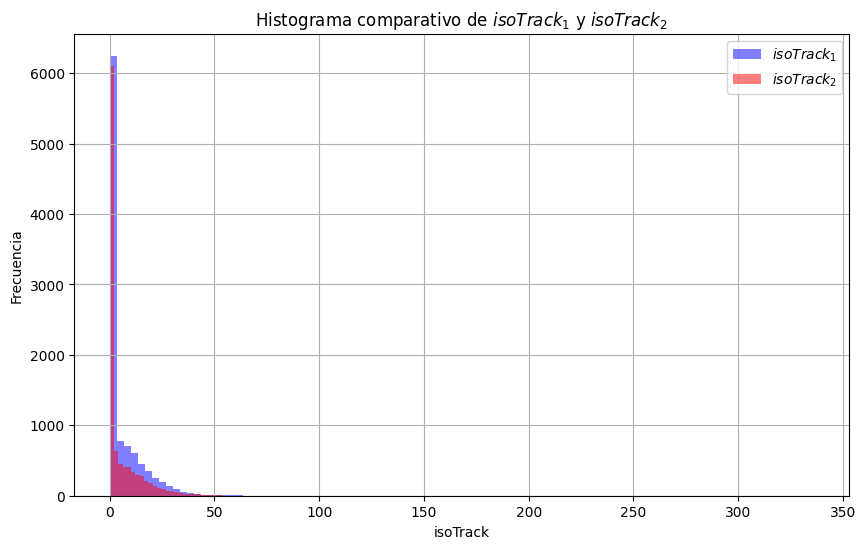

In [8]:
# Calcular estadísticas para isoTrack1 y isoTrack2
statistics_isoTrack = {
    'Variable': ['isoTrack1', 'isoTrack2'],
    'Count': [particles['isoTrack1'].count(), particles['isoTrack2'].count()],
    'Media': [particles['isoTrack1'].mean(), particles['isoTrack2'].mean()],
    'Desviación Estándar': [particles['isoTrack1'].std(), particles['isoTrack2'].std()],
    'Moda': [particles['isoTrack1'].value_counts().idxmax(), particles['isoTrack2'].value_counts().idxmax()],
    'Mínimo': [particles['isoTrack1'].min(), particles['isoTrack2'].min()],
    'Máximo': [particles['isoTrack1'].max(), particles['isoTrack2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_isoTrack_df = pd.DataFrame(statistics_isoTrack)

# Mostrar la tabla de estadísticas
print(statistics_isoTrack_df)

# Crear el histograma comparativo para los aislamientos en el tracker
plt.figure(figsize=(10, 6))
plt.hist(particles['isoTrack1'], bins=100, alpha=0.5, label='$isoTrack_{1}$', color='blue')
plt.hist(particles['isoTrack2'], bins=100, alpha=0.5, label='$isoTrack_{2}$', color='red')
plt.title('Histograma comparativo de $isoTrack_{1}$ y $isoTrack_{2}$')
plt.xlabel('isoTrack')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

   Variable  Count     Media  Desviación Estándar  Moda  Mínimo   Máximo
0  isoEcal1  10000  4.678145             4.885182   0.0     0.0  79.6421
1  isoEcal2  10000  4.303183             4.732648   0.0     0.0  74.7395


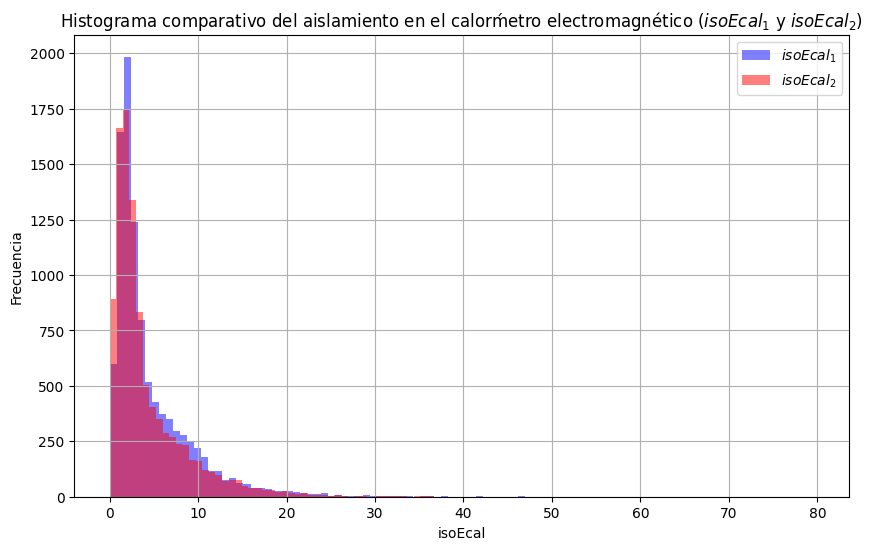

In [9]:
# Calcular estadísticas para isoEcal1 y isoEcal2
statistics_isoEcal = {
    'Variable': ['isoEcal1', 'isoEcal2'],
    'Count': [particles['isoEcal1'].count(), particles['isoEcal2'].count()],
    'Media': [particles['isoEcal1'].mean(), particles['isoEcal2'].mean()],
    'Desviación Estándar': [particles['isoEcal1'].std(), particles['isoEcal2'].std()],
    'Moda': [particles['isoEcal1'].value_counts().idxmax(), particles['isoEcal2'].value_counts().idxmax()],
    'Mínimo': [particles['isoEcal1'].min(), particles['isoEcal2'].min()],
    'Máximo': [particles['isoEcal1'].max(), particles['isoEcal2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_isoEcal_df = pd.DataFrame(statistics_isoEcal)

# Mostrar la tabla de estadísticas
print(statistics_isoEcal_df)

# Crear el histograma comparativo para el aislamiento en el calorímetro eslectromagnético
plt.figure(figsize=(10, 6))
plt.hist(particles['isoEcal1'], bins=100, alpha=0.5, label='$isoEcal_{1}$', color='blue')
plt.hist(particles['isoEcal2'], bins=100, alpha=0.5, label='$isoEcal_{2}$', color='red')
plt.title('Histograma comparativo del aislamiento en el calorḿetro electromagnético ($isoEcal_{1}$ y $isoEcal_{2}$)')
plt.xlabel('isoEcal')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

   Variable  Count     Media  Desviación Estándar  Moda  Mínimo   Máximo
0  isoHcal1  10000  2.236042             3.344397   0.0     0.0  39.2322
1  isoHcal2  10000  2.152813             3.236533   0.0     0.0  72.4930


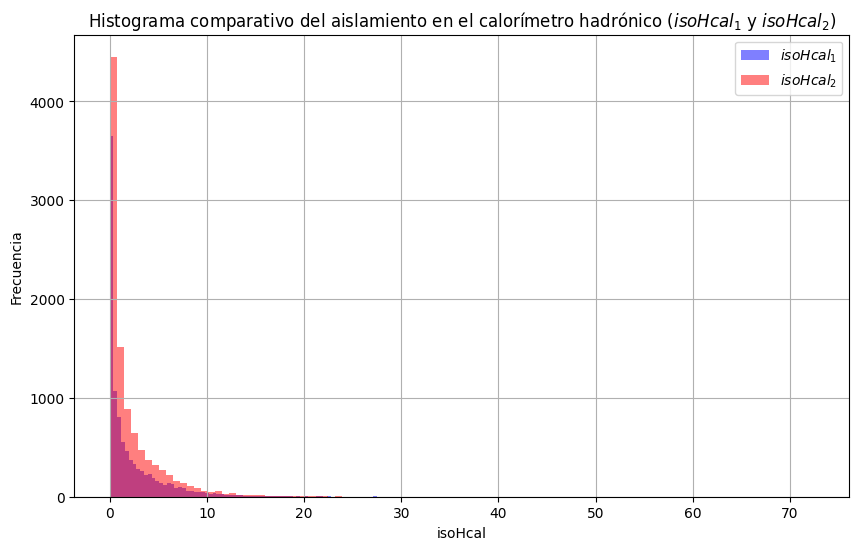

In [10]:
# Calcular estadísticas para isoHcal1 y isoHcal2
statistics_isoHcal = {
    'Variable': ['isoHcal1', 'isoHcal2'],
    'Count': [particles['isoHcal1'].count(), particles['isoHcal2'].count()],
    'Media': [particles['isoHcal1'].mean(), particles['isoHcal2'].mean()],
    'Desviación Estándar': [particles['isoHcal1'].std(), particles['isoHcal2'].std()],
    'Moda': [particles['isoHcal1'].value_counts().idxmax(), particles['isoHcal2'].value_counts().idxmax()],
    'Mínimo': [particles['isoHcal1'].min(), particles['isoHcal2'].min()],
    'Máximo': [particles['isoHcal1'].max(), particles['isoHcal2'].max()]
}

# Crear DataFrame con las estadísticas
statistics_isoHcal_df = pd.DataFrame(statistics_isoHcal)

# Mostrar la tabla de estadísticas
print(statistics_isoHcal_df)

# Crear el histograma comparativo para el aislamiento en el calorímetro hadrónico
plt.figure(figsize=(10, 6))
plt.hist(particles['isoHcal1'], bins=100, alpha=0.5, label='$isoHcal_{1}$', color='blue')
plt.hist(particles['isoHcal2'], bins=100, alpha=0.5, label='$isoHcal_{2}$', color='red')
plt.title('Histograma comparativo del aislamiento en el calorímetro hadrónico ($isoHcal_{1}$ y $isoHcal_{2}$)')
plt.xlabel('isoHcal')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Calcular la masa invariante para ambos electrones
particles['invariant_mass'] = np.sqrt(2 * particles['pt1'] * particles['pt2'] *
                                      (np.cosh(particles['eta1'] - particles['eta2']) - np.cos(particles['phi1'] - particles['phi2'])))

# Mostrar las primeras filas para verificar
print(particles[['pt1', 'eta1', 'phi1', 'pt2', 'eta2', 'phi2', 'invariant_mass']].head())

       pt1    eta1    phi1      pt2    eta2    phi2  invariant_mass
0  37.5667  2.2892  2.0526  45.4315  1.4706 -1.1630       89.590677
1  36.2901 -0.8373 -1.5859  60.5754 -0.4896  1.0496       92.252203
2  25.9705 -0.6974  1.6360  45.2954 -2.0401  3.1187       67.859050
3  41.0075  1.4619 -0.5325  45.9013  1.1561  2.4786       87.604679
4  39.8985 -0.5927 -2.3947  34.8931 -2.2444  0.6106      101.424147


         Variable  Count      Media  Desviación Estándar       Moda  \
0  invariant_mass  10000  88.891413            12.125822  89.590677   

      Mínimo      Máximo  
0  60.001986  119.967439  


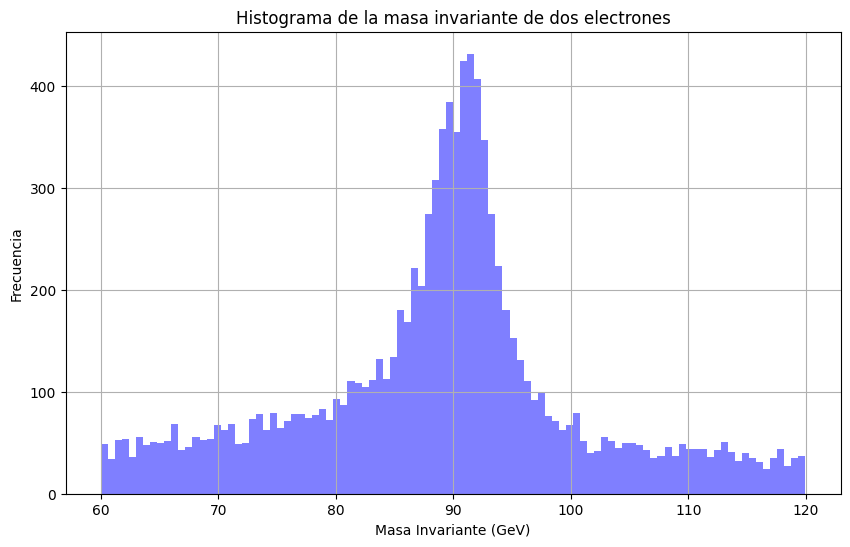

In [12]:
# Calcular estadísticas para la masa invariante
statistics_mass = {
    'Variable': ['invariant_mass'],
    'Count': [particles['invariant_mass'].count()],
    'Media': [particles['invariant_mass'].mean()],
    'Desviación Estándar': [particles['invariant_mass'].std()],
    'Moda': [particles['invariant_mass'].value_counts().idxmax()],
    'Mínimo': [particles['invariant_mass'].min()],
    'Máximo': [particles['invariant_mass'].max()]
}

# Crear DataFrame con las estadísticas
statistics_mass_df = pd.DataFrame(statistics_mass)

# Mostrar la tabla de estadísticas
print(statistics_mass_df)

# Crear el histograma de la masa invariante
plt.figure(figsize=(10, 6))
plt.hist(particles['invariant_mass'], bins=100, alpha=0.5, color='blue')
plt.title('Histograma de la masa invariante de dos electrones')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [13]:
# Calcular la suma de las cargas para ambos electrones
particles['charge_sum'] = particles['Q1'] + particles['Q2']

# Mostrar las primeras filas para verificar
print(particles[['Q1', 'Q2', 'charge_sum']].head())

   Q1  Q2  charge_sum
0  -1   1           0
1   1  -1           0
2  -1   1           0
3   1  -1           0
4   1  -1           0


     Variable  Count   Media  Desviación Estándar  Moda  Mínimo  Máximo
0  charge_sum  10000  0.0122             0.981605     0      -2       2


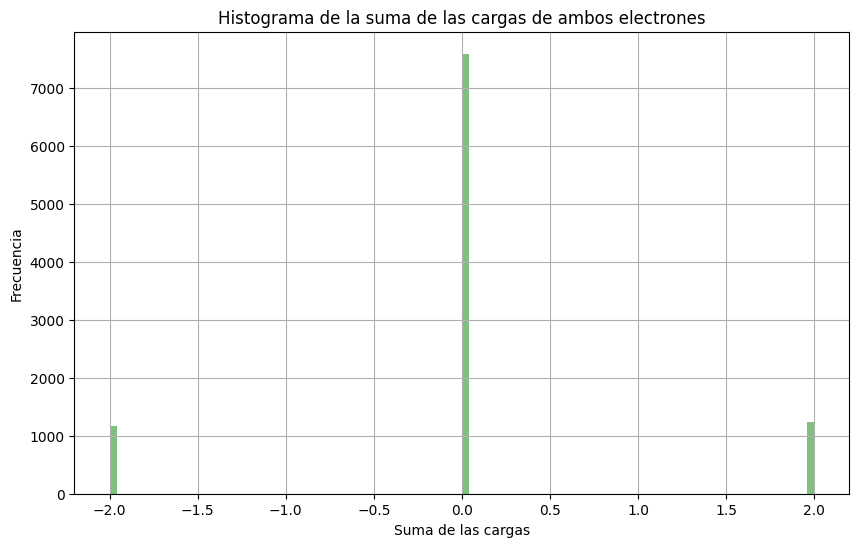

In [14]:
# Calcular estadísticas para la suma de las cargas
statistics_charge = {
    'Variable': ['charge_sum'],
    'Count': [particles['charge_sum'].count()],
    'Media': [particles['charge_sum'].mean()],
    'Desviación Estándar': [particles['charge_sum'].std()],
    'Moda': [particles['charge_sum'].value_counts().idxmax()],
    'Mínimo': [particles['charge_sum'].min()],
    'Máximo': [particles['charge_sum'].max()]
}

# Crear DataFrame con las estadísticas
statistics_charge_df = pd.DataFrame(statistics_charge)

# Mostrar la tabla de estadísticas
print(statistics_charge_df)

# Crear el histograma de la suma de las cargas
plt.figure(figsize=(10, 6))
plt.hist(particles['charge_sum'], bins=100, alpha=0.5, color='green')
plt.title('Histograma de la suma de las cargas de ambos electrones')
plt.xlabel('Suma de las cargas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

    $type_1$  $type_2$
EB      7589      6120
EE      2411      3880


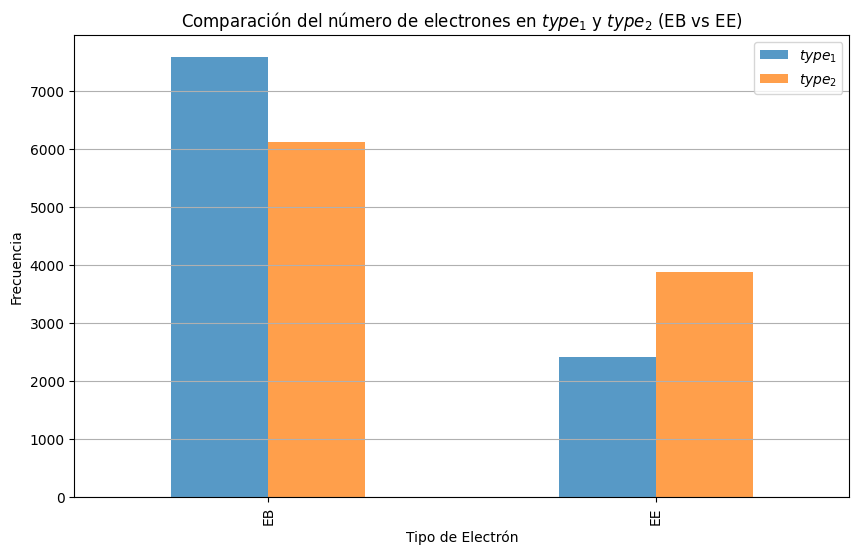

In [15]:
# Contar el número de electrones de cada tipo para type1 y type2
count_type1 = particles['type1'].value_counts()
count_type2 = particles['type2'].value_counts()

# Crear un DataFrame con los conteos
df_counts = pd.DataFrame({'$type_1$': count_type1, '$type_2$': count_type2})

# Mostrar la tabla con los conteos
print(df_counts)

# Crear el histograma comparativo para type1 y type2
df_counts.plot(kind='bar', figsize=(10, 6), alpha=0.75)

# Personalizar el gráfico
plt.title('Comparación del número de electrones en $type_1$ y $type_2$ (EB vs EE)')
plt.xlabel('Tipo de Electrón')
plt.ylabel('Frecuencia')
plt.grid(True, axis='y')

# Mostrar el gráfico
plt.show()


                   Variable  Count      Media  Desviación Estándar       Moda  \
0    invariant_mass (antes)  10000  88.891413            12.125822  89.590677   
1  invariant_mass (después)   8525  89.349340             8.122416  89.590677   

      Mínimo      Máximo  
0  60.001986  119.967439  
1  70.003100  109.957301  


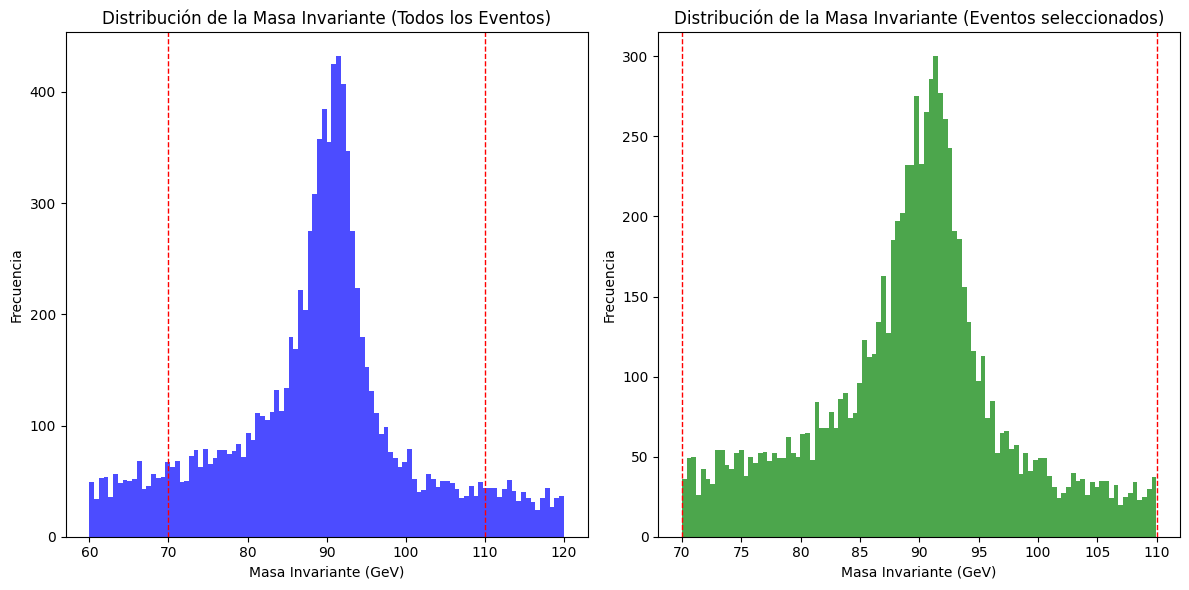

In [16]:
# Definir el rango de masa invariante para el bosón Z
min_mass_Z = 70
max_mass_Z = 110

# Seleccionar eventos con masa invariante cerca de la masa del bosón Z
selected_events_mass = particles[(particles['invariant_mass'] >= min_mass_Z) & (particles['invariant_mass'] <= max_mass_Z)]

# Calcular estadísticas de la masa invariante antes del corte
mean_mass_before = particles['invariant_mass'].mean()
std_dev_mass_before = particles['invariant_mass'].std()
mode_mass_before = particles['invariant_mass'].value_counts().idxmax()
min_mass_before = particles['invariant_mass'].min()
max_mass_before = particles['invariant_mass'].max()
count_mass_before = particles['invariant_mass'].count()

# Calcular estadísticas de la masa invariante después del corte
mean_mass_after = selected_events_mass['invariant_mass'].mean()
std_dev_mass_after = selected_events_mass['invariant_mass'].std()
mode_mass_after = selected_events_mass['invariant_mass'].value_counts().idxmax()
min_mass_after = selected_events_mass['invariant_mass'].min()
max_mass_after = selected_events_mass['invariant_mass'].max()
count_mass_after = selected_events_mass['invariant_mass'].count()

# Crear un diccionario con las estadísticas antes y después del corte
statistics_mass = {
    'Variable': ['invariant_mass (antes)', 'invariant_mass (después)'],
    'Count': [count_mass_before, count_mass_after],
    'Media': [mean_mass_before, mean_mass_after],
    'Desviación Estándar': [std_dev_mass_before, std_dev_mass_after],
    'Moda': [mode_mass_before, mode_mass_after],
    'Mínimo': [min_mass_before, min_mass_after],
    'Máximo': [max_mass_before, max_mass_after]
}

# Crear DataFrame con las estadísticas
statistics_mass_df = pd.DataFrame(statistics_mass)

# Mostrar la tabla de estadísticas
print(statistics_mass_df)

# Visualizar la distribución de la masa invariante antes y después del corte
plt.figure(figsize=(12, 6))

# Histograma antes del corte
plt.subplot(1, 2, 1)
plt.hist(particles['invariant_mass'], bins=100, color='b', alpha=0.7)
plt.axvline(x=min_mass_Z, color='r', linestyle='--', linewidth=1)
plt.axvline(x=max_mass_Z, color='r', linestyle='--', linewidth=1)
plt.title('Distribución de la Masa Invariante (Todos los Eventos)')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')

# Histograma después del corte
plt.subplot(1, 2, 2)
plt.hist(selected_events_mass['invariant_mass'], bins=100, color='g', alpha=0.7)
plt.axvline(x=min_mass_Z, color='r', linestyle='--', linewidth=1)
plt.axvline(x=max_mass_Z, color='r', linestyle='--', linewidth=1)
plt.title('Distribución de la Masa Invariante (Eventos seleccionados)')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

                            Variable  Count      Media  Desviación Estándar  \
0  invariant_mass (después, tipo EB)   4301  89.242534             7.871164   

        Moda     Mínimo      Máximo  
0  92.252203  70.012754  109.922282  


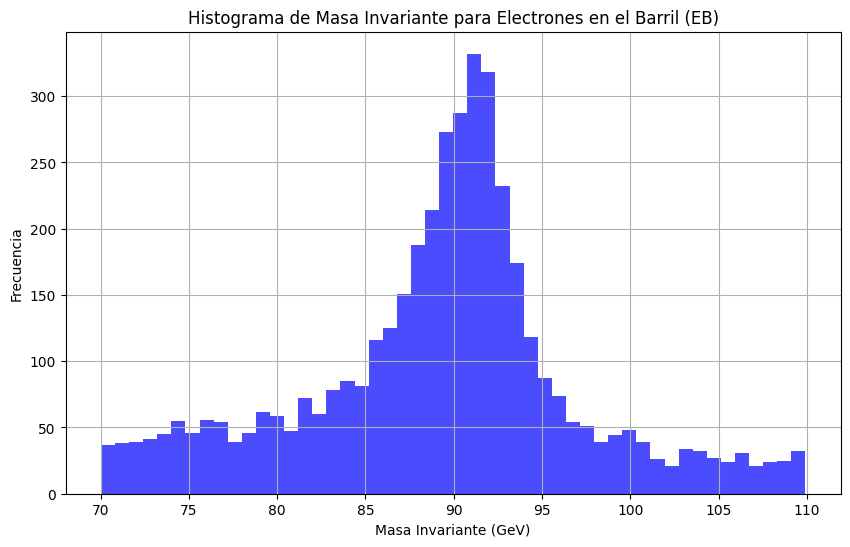

Número de eventos seleccionados: 4301


In [17]:
# Filtrar por tipo EB (Electrón en el Barril)
selected_events_EB = selected_events_mass[(selected_events_mass['type1'] == 'EB') & (selected_events_mass['type2'] == 'EB')]

# Calcular estadísticas de la masa invariante después del corte y filtro por tipo EB para ambos electrones
mean_mass_after_EB = selected_events_EB['invariant_mass'].mean()
std_dev_mass_after_EB = selected_events_EB['invariant_mass'].std()
mode_mass_after_EB = selected_events_EB['invariant_mass'].value_counts().idxmax()
min_mass_after_EB = selected_events_EB['invariant_mass'].min()
max_mass_after_EB = selected_events_EB['invariant_mass'].max()
count_mass_after_EB = selected_events_EB['invariant_mass'].count()

# Crear un DataFrame con las estadísticas después del corte y filtro por tipo EB para ambos electrones
statistics_mass_after_EB_df = pd.DataFrame({
    'Variable': ['invariant_mass (después, tipo EB)'],
    'Count': [count_mass_after_EB],
    'Media': [mean_mass_after_EB],
    'Desviación Estándar': [std_dev_mass_after_EB],
    'Moda': [mode_mass_after_EB],
    'Mínimo': [min_mass_after_EB],
    'Máximo': [max_mass_after_EB]
    })

# Mostrar la tabla de estadísticas después del corte y filtro por tipo EB para ambos electrones
print(statistics_mass_after_EB_df)

# Crear un histograma de la masa invariante de los eventos seleccionados
plt.figure(figsize=(10, 6))
plt.hist(selected_events_EB['invariant_mass'], bins=50, color='b', alpha=0.7)
plt.title('Histograma de Masa Invariante para Electrones en el Barril (EB)')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Opcional: Verificar número de eventos seleccionados
print(f"Número de eventos seleccionados: {len(selected_events_EB)}")

Número de eventos seleccionados después del filtro por carga: 3510


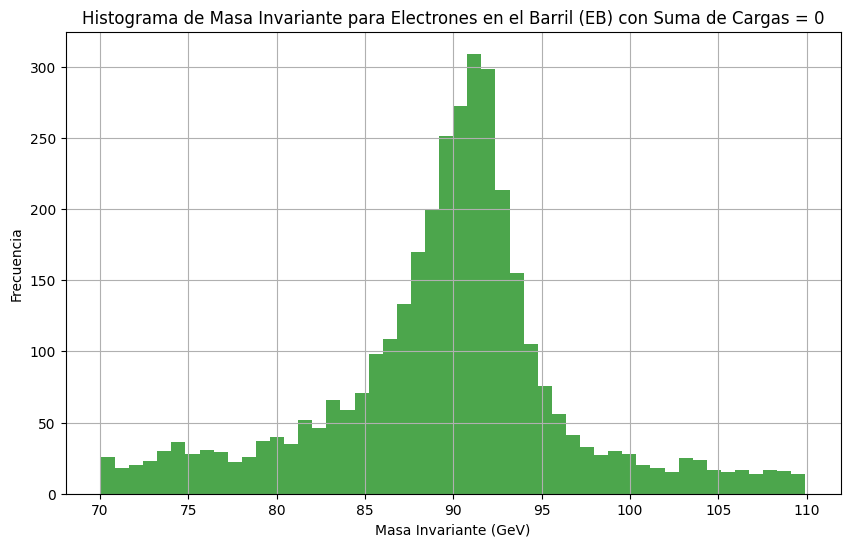


Estadísticas para la masa invariante después del filtro por carga:
         Variable  Count      Media  Desviación Estándar       Moda  \
0  invariant_mass   3510  89.557164             6.959171  92.252203   

      Mínimo      Máximo  
0  70.059342  109.922282  


In [19]:
# Filtrar por suma de cargas igual a 0
selected_events_EB_charge_zero = selected_events_EB[selected_events_EB['charge_sum'] == 0]

# Mostrar la cantidad de eventos seleccionados después del segundo filtro
print(f"Número de eventos seleccionados después del filtro por carga: {len(selected_events_EB_charge_zero)}")

# Opcional: Crear histograma de la masa invariante después del segundo filtro
plt.figure(figsize=(10, 6))
plt.hist(selected_events_EB_charge_zero['invariant_mass'], bins=50, color='g', alpha=0.7)
plt.title('Histograma de Masa Invariante para Electrones en el Barril (EB) con Suma de Cargas = 0')
plt.xlabel('Masa Invariante (GeV)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Calcular estadísticas de la masa invariante después del segundo filtro
mean_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].mean()
std_dev_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].std()
mode_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].value_counts().idxmax()
min_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].min()
max_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].max()
count_mass_charge_zero = selected_events_EB_charge_zero['invariant_mass'].count()

# Crear un diccionario con las estadísticas después del segundo filtro
statistics_mass_charge_zero = {
    'Variable': ['invariant_mass'],
    'Count': [count_mass_charge_zero],
    'Media': [mean_mass_charge_zero],
    'Desviación Estándar': [std_dev_mass_charge_zero],
    'Moda': [mode_mass_charge_zero],
    'Mínimo': [min_mass_charge_zero],
    'Máximo': [max_mass_charge_zero]
}

# Crear DataFrame con las estadísticas después del filtro por carga
statistics_mass_charge_zero_df = pd.DataFrame(statistics_mass_charge_zero)

# Mostrar la tabla de estadísticas después del filtro por carga
print("\nEstadísticas para la masa invariante después del filtro por carga:")
print(statistics_mass_charge_zero_df)